<a href="https://colab.research.google.com/github/nirajlondhe8/aiml/blob/main/keras_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

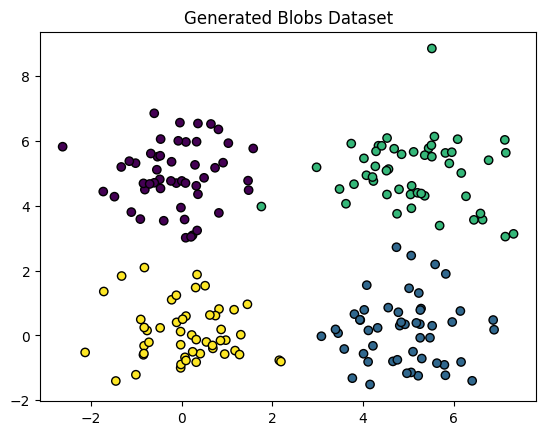

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Training Accuracy: 0.987500011920929
Final Validation Accuracy: 0.9750000238418579


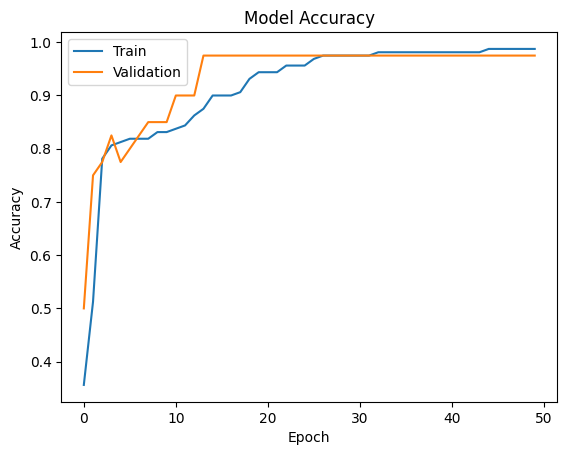

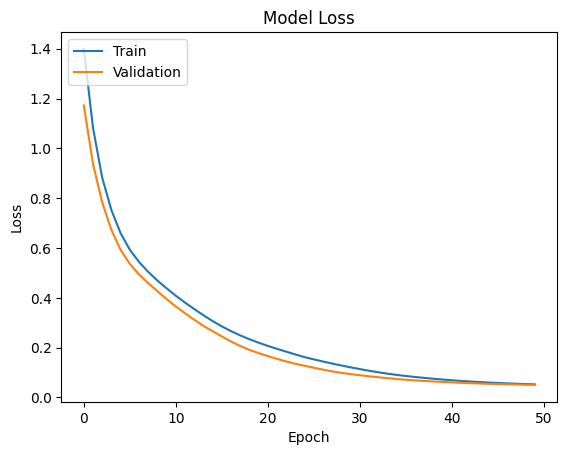

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Generate the blobs dataset
X, y = make_blobs(n_samples=[50, 50, 50, 50], centers=[[0, 5], [5, 0], [5, 5], [0, 0]],
                  random_state=42)

# Plot the dataset to visualize the blobs
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.title("Generated Blobs Dataset")
plt.show()

# Convert labels to categorical (one-hot encoding) for multi-class classification
y = to_categorical(y, 4)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network
model = Sequential([
    Dense(100, activation='relu', input_shape=(X.shape[1],)),
    Dense(50, activation='relu'),
    Dense(4, activation='softmax')  # 4 output units for 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))

# Print the final accuracy
print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


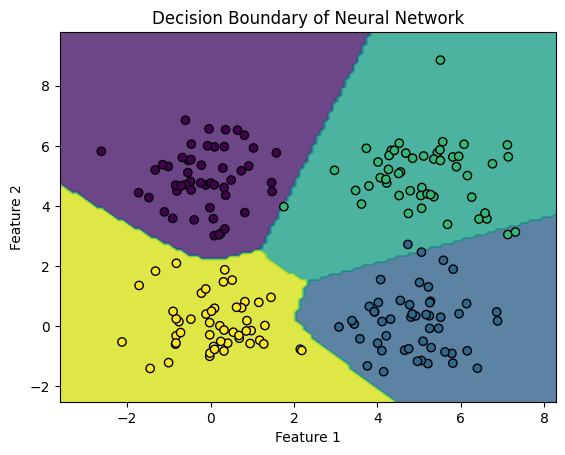

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid over the feature space (X-axis and Y-axis)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class probabilities for each point on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)  # Convert probabilities to class labels
Z = Z.reshape(xx.shape)

# Create the contour plot for the decision boundary
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

# Plot the original dataset points
plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolors='k', marker='o', cmap='viridis')
plt.title('Decision Boundary of Neural Network')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
